In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import glob
from sklearn.metrics import roc_auc_score, roc_curve
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
from pathlib import Path

In [17]:
# Give the paths of train files (normal + anomalous)
non_english_path_train = r"C:\Users\muqad\OneDrive\Desktop\Semester 2\Natural Computing\Anomalous_URL_MDP_Strings\MDP_Strings\StringSet1\PhishingMDPURLs_0Drift.test"
english_path_train = r"C:\Users\muqad\OneDrive\Desktop\Semester 2\Natural Computing\Anomalous_URL_MDP_Strings\MDP_Strings\StringSet2\BenignMDPURLs_2_0Drift.train"
with open(english_path_train, "r", encoding="utf-8") as f:
    english_texts = [line.strip() for line in f if line.strip()]
y_english = [1] * len(english_texts)

# Load non-English lines (label = 0)
with open(non_english_path_train, "r", encoding="utf-8") as f:
    non_english_texts = [line.strip() for line in f if line.strip()]
y_non_english = [0] * len(non_english_texts)

# 3. Combine (anomalous + english)
X_raw = english_texts + non_english_texts
y_raw = y_english + y_non_english


# convert textual data into numerical
vectorizer = TfidfVectorizer(
    analyzer='char',
    ngram_range=(1, 3),
    max_features=5000
)

# create a pipeline to numeric->textual, and apply kNN model.
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(analyzer='char', ngram_range=(1,3))),
    ('knn',   KNeighborsClassifier(n_neighbors=3, metric='cosine'))
])
# train the model
pipeline = pipeline.fit(X_raw, y_raw)
# test files for kNN
non_english_path_test =  glob.glob(r"C:\Users\muqad\OneDrive\Desktop\Semester 2\Natural Computing\Anomalous_URL_MDP_Strings\MDP_Strings\StringSet2\phishing\*")
english_path_test = r"C:\Users\muqad\OneDrive\Desktop\Semester 2\Natural Computing\Anomalous_URL_MDP_Strings\MDP_Strings\StringSet2\BenignMDPURLs_2_0Drift.test"

### testing the kNN model

In [18]:
def testing_knn_model(english_path, non_english_path, pipeline):

    with open(english_path, "r", encoding="utf-8") as f:
        english_texts = [line.strip() for line in f if line.strip()]
    y_english = [1] * len(english_texts)

    # Load non-English lines (label = 0)
    with open(non_english_path, "r", encoding="utf-8") as f:
        non_english_texts = [line.strip() for line in f if line.strip()]
    y_non_english = [0] * len(non_english_texts)

    # Combine
    X_raw = english_texts + non_english_texts
    y_raw = y_english + y_non_english



    y_pred_proba = pipeline.predict_proba(X_raw)[:, 1]
    return y_raw, y_pred_proba

### Plot results of kNN and NSA together

C:\Users\muqad\OneDrive\Desktop\Semester 2\Natural Computing\intrusion\MDP_NSA_Result\Drift - 0%.txt
C:\Users\muqad\OneDrive\Desktop\Semester 2\Natural Computing\intrusion\MDP_NSA_Result\Drift - 0%.txt
C:\Users\muqad\OneDrive\Desktop\Semester 2\Natural Computing\intrusion\MDP_NSA_Result\Drift - 20%.txt
C:\Users\muqad\OneDrive\Desktop\Semester 2\Natural Computing\intrusion\MDP_NSA_Result\Drift - 20%.txt
C:\Users\muqad\OneDrive\Desktop\Semester 2\Natural Computing\intrusion\MDP_NSA_Result\Drift - 40%.txt
C:\Users\muqad\OneDrive\Desktop\Semester 2\Natural Computing\intrusion\MDP_NSA_Result\Drift - 40%.txt
C:\Users\muqad\OneDrive\Desktop\Semester 2\Natural Computing\intrusion\MDP_NSA_Result\Drift - 60%.txt
C:\Users\muqad\OneDrive\Desktop\Semester 2\Natural Computing\intrusion\MDP_NSA_Result\Drift - 60%.txt
C:\Users\muqad\OneDrive\Desktop\Semester 2\Natural Computing\intrusion\MDP_NSA_Result\Drift - 80%.txt
C:\Users\muqad\OneDrive\Desktop\Semester 2\Natural Computing\intrusion\MDP_NSA_Resul

C:\Users\muqad\AppData\Local\Temp\ipykernel_98552\921508007.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path,
C:\Users\muqad\AppData\Local\Temp\ipykernel_98552\921508007.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path,
C:\Users\muqad\AppData\Local\Temp\ipykernel_98552\921508007.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path,
C:\Users\muqad\AppData\Local\Temp\ipykernel_98552\921508007.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(path,
C:\Users\muqad\AppData\Local\Temp\ipykernel_98552\921508007.py:2: Fu

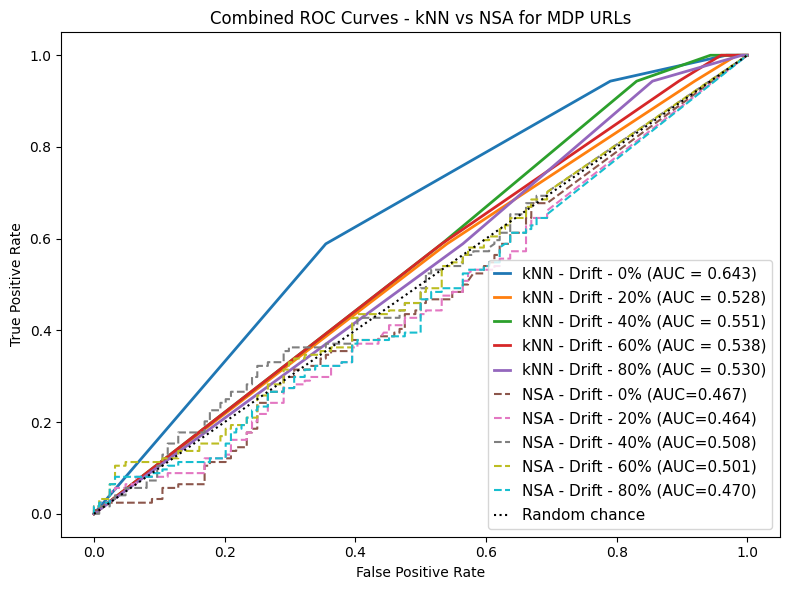

In [19]:

def read_labels_and_scores(path):
    df = pd.read_csv(path,
                     delim_whitespace=True,
                     header=None,
                     names=["Value", "Language"])
    y_true  = (df["Language"] == "Anomalous").astype(int).values
    y_score = df["Value"].values
    return y_true, y_score

def plot_roc_curve(y_true, y_score, label, ax, **plot_kwargs):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    auc = roc_auc_score(y_true, y_score)
    ax.plot(fpr, tpr, label=f"{label} (AUC={auc:.3f})", **plot_kwargs)
    

fig, ax = plt.subplots(figsize=(8,6))

# Plot kNN results
for non_english_path_test in non_english_path_test:
    y_test, y_pred_proba = testing_knn_model(english_path_test, non_english_path_test, pipeline)
    y_scores = y_pred_proba[:, 1] if y_pred_proba.ndim == 2 else y_pred_proba
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = roc_auc_score(y_test, y_scores)
    label = non_english_path_test.split("\\")[-1].replace(".test", "")
    plt.plot(fpr, tpr, lw=2, label=f"kNN - {label} (AUC = {roc_auc:.3f})")

file_pattern = r"C:\Users\muqad\OneDrive\Desktop\Semester 2\Natural Computing\intrusion\MDP_NSA_Result\*"
result_paths = glob.glob(file_pattern)
# Plot NSA results
for path in result_paths:
    print(path)
    y_true, y_score = read_labels_and_scores(path)
    label = Path(path).stem
    print(path)
    plot_roc_curve(y_true, y_score, f"NSA - {label}", ax, linestyle="--")

# Plot all the results
ax.plot([0,1], [0,1], 'k:', label="Random chance")
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
ax.set_title("Combined ROC Curves - kNN vs NSA for MDP URLs")
ax.legend(
    loc="lower right",
    fontsize=11,        # 12-point text
    ncol=1,
    labelspacing=0.6,
    handlelength=1,
    columnspacing=0
)
plt.tight_layout()

plt.show()
